In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
from scipy.stats import norm
from scipy.special import gamma as gamma_func
from scipy.integrate import quad
import tikzplotlib as tpl
np.random.seed(42)

In [3]:
# Make inline plots vector graphics
from IPython.display import set_matplotlib_formats

set_matplotlib_formats("pdf", "svg")

#matplotlib.rc("font", **{"family": "serif", "serif": ["Times Roman"]})
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["text.usetex"] = True
plt.rcParams["text.latex.preamble"] = r"\usepackage{amsfonts} \usepackage{amsmath}"

# Gamma Distribution Laplace Propagation

In [4]:
# functions

def gamma_pdf(x, a, l):
    r = l**a/gamma_func(a) * (x ** (a-1)) * (np.exp(-x*l))
    return(r)

def gamma_pdf_t_log(x, a, l):
    c = gamma_func(a) /l**a
    r = 1/c * (np.exp(x) ** a) * (np.exp(-np.exp(x) * l))
    return(r)

def gamma_pdf_t_sqrt(x, a, l):
    c = 1/2 * l**(-a) * gamma_func(a)
    r = 1/c * (x**(2*a-1)) * (np.exp(- (x**2) * l))
    return(r)

def gamma_mode(a, l):
    return((a-1)/l)

def gamma_var(a,l):
    return((a-1)/l**2)

"""Transforms: log"""

def gamma_t_log_mode(a, l):
    return(np.log(a/l))


def gamma_t_log_var(a):
    return(1/a)

def log_normal_back(x, mu, sigma):
    x_ = np.log(x)
    return(norm.pdf(x_, mu, sigma) * 1/x)


"""Transforms: sqrt"""

def gamma_t_sqrt_mode(a, l):
    return(np.sqrt((a-0.5)/l))
#    return(np.sqrt((a)/l))

def gamma_t_sqrt_var(l):
    return(1/(4*l))

def sqrt_normal_back(x, mu, sigma):
    x_ = np.sqrt(x)
    return(norm.pdf(x_, mu, sigma) * 0.5 * 1/np.sqrt(x))

## log basis

In [5]:
#change the basis, i.e. x -> t(x)

#######EXPONENTIAL BASIS TRANSFORM########
#exp transform <-> log basis

"""values"""
def plot_gamma_t_log(params, save=False, filename='gamma_log_bridge.pdf', show_back=False):
    
    a1, l1 = params[0] #5,1
    a2, l2 = params[1] #4,2
    a3, l3 = params[2] #8,3

    #normal
    mode1 = gamma_mode(a1, l1)
    mode2 = gamma_mode(a2, l2)
    mode3 = gamma_mode(a3, l3)

    sigma1 = np.sqrt(gamma_var(a1, l1))
    sigma2 = np.sqrt(gamma_var(a2, l2))
    sigma3 = np.sqrt(gamma_var(a3, l3))

    x = np.linspace(0, 7, 1000 + 1)
    x_t = np.linspace(-3, 4, 1000 + 1)
    y1 = gamma_pdf(x, a1, l1)
    y2 = gamma_pdf(x, a2, l2)
    y3 = gamma_pdf(x, a3, l3)
    lp_approx1 = norm.pdf(x, loc=mode1, scale=sigma1)
    lp_approx2 = norm.pdf(x, loc=mode2, scale=sigma2)
    lp_approx3 = norm.pdf(x, loc=mode3, scale=sigma3)

    #transform

    y1_t_log = gamma_pdf_t_log(x_t, a1, l1)
    y2_t_log = gamma_pdf_t_log(x_t, a2, l2)
    y3_t_log = gamma_pdf_t_log(x_t, a3, l3)
    mode1_t_log = gamma_t_log_mode(a1, l1)
    mode2_t_log = gamma_t_log_mode(a2, l2)
    mode3_t_log = gamma_t_log_mode(a3, l3)

    sigma1_t_log = np.sqrt(gamma_t_log_var(a1))
    sigma2_t_log = np.sqrt(gamma_t_log_var(a2))
    sigma3_t_log = np.sqrt(gamma_t_log_var(a3))
    lp_approx1_t_log = norm.pdf(x_t, loc=mode1_t_log, scale=sigma1_t_log) 
    lp_approx2_t_log = norm.pdf(x_t, loc=mode2_t_log, scale=sigma2_t_log) 
    lp_approx3_t_log = norm.pdf(x_t, loc=mode3_t_log, scale=sigma3_t_log) 

    #back transform
    y1_back = log_normal_back(x, mode1_t_log, sigma1_t_log)
    y2_back = log_normal_back(x, mode2_t_log, sigma2_t_log)
    y3_back = log_normal_back(x, mode3_t_log, sigma3_t_log)

    """Plots"""
    plt.rc('text', usetex=True)
    plt.rc('xtick', labelsize=12)
    plt.rc('ytick', labelsize=15)
    plt.rc('axes', labelsize=15)
    
    legend_size=14
    xlabel_size=15
    ylabel_size=15
    title_size=15
    lw=2

    if show_back:
        fig, axs = plt.subplots(nrows=1, ncols=3, sharex=False, figsize=(10, 3))
    else:
        fig, axs = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(10, 3))
    
    
    #first plot
    axs[0].plot(x, y1, 'r-', lw=lw)
    axs[0].plot(x, y2, 'b-', lw=lw)
    axs[0].plot(x, y3, 'k-', lw=lw, label='$\mathcal{G}$')
    axs[0].plot(x, lp_approx1, 'r--', lw=lw)
    axs[0].plot(x, lp_approx2, 'b--', lw=lw)
    axs[0].plot(x, lp_approx3, 'k--', lw=lw, label='$\mathcal{N}$')
    axs[0].set_yticklabels([])
    axs[0].set_yticks([])
    axs[0].set_xlabel('$g(x)$', fontsize=xlabel_size)
    axs[0].set_ylabel('$p(g(x))dg(x)$', fontsize=ylabel_size)
    axs[0].set_title('Laplace in standard basis', fontsize=title_size)
    axs[0].legend(prop={'size': legend_size});

    #second plot
    axs[1].plot(x_t, y1_t_log, 'r-', lw=lw)
    axs[1].plot(x_t, y2_t_log, 'b-', lw=lw)
    axs[1].plot(x_t, y3_t_log, 'k-', lw=lw, label='$\mathcal{G}$')
    axs[1].plot(x_t, lp_approx1_t_log, 'r--', lw=lw)
    axs[1].plot(x_t, lp_approx2_t_log, 'b--', lw=lw)
    axs[1].plot(x_t, lp_approx3_t_log, 'k--', lw=lw, label='$\mathcal{N}$')
    axs[1].set_yticklabels([])
    axs[1].set_yticks([])
    axs[1].set_xlabel('$x$', fontsize=xlabel_size)
    axs[1].set_ylabel('$p(x)dx$', fontsize=ylabel_size)
    axs[1].set_title('Laplace in log basis', fontsize=title_size)
    axs[1].legend(prop={'size': legend_size});


    #"""
    if show_back:
        axs[2].plot(x, y1, 'r-', lw=lw)
        axs[2].plot(x, y2, 'b-', lw=lw)
        axs[2].plot(x, y3, 'k-', lw=lw, label="$\mathcal{G}$");
        axs[2].plot(x, y1_back, 'r--', lw=lw)
        axs[2].plot(x, y2_back, 'b--', lw=lw)
        axs[2].plot(x, y3_back, 'k--', lw=lw, label="$\mathcal{N}$")
        axs[2].set_yticklabels([])
        axs[2].set_yticks([])
        axs[2].set_xlabel('$g(x)$', fontsize=xlabel_size)
        axs[2].set_ylabel('$p(g(x))dg(x)$', fontsize=ylabel_size)
        axs[2].set_title('Back to standard basis', fontsize=title_size)
        axs[2].legend(prop={'size': legend_size});
    #"""

    plt.tight_layout()
    if save:
        plt.savefig(filename)
        #use tikz instead
        #"""
        tpl.save(
            "gamma_log_bridge.tex",
            figure = fig,
            axis_width = "\\figwidth",
            axis_height= "\\figheight",
            tex_relative_path_to_data=".",
            override_externals=True,
            float_format=".3g",
            #strict=True
        )
        #"""
        
    plt.show();

/home/marius/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1740: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/home/marius/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1740: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/home/marius/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in greater_equal
  return (a <= x) & (x <= b)
/home/marius/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in less_equal
  return (a <= x) & (x <= b)
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered 

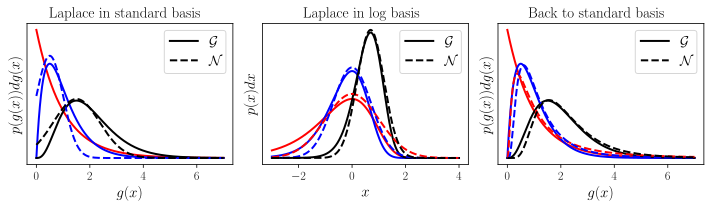

In [6]:
plot_gamma_t_log(params=[[1,1], [2,2], [4,2]], save=True, filename='Gamma_log_bridge.pdf', show_back=True)

## sqrt basis

In [7]:
#change the basis, i.e. x -> t(x)

###########SQUARE###################
#square transform <-> sqrt basis

"""values"""
def plot_gamma_t_sqrt(params, save=False, filename='gamma_sqrt_bridge.pdf', show_back=False, samples=False):

    a1, l1 = params[0] #5,1
    a2, l2 = params[1] #4,2
    a3, l3 = params[2] #8,3

    #normal
    mode1 = gamma_mode(a1, l1)
    mode2 = gamma_mode(a2, l2)
    mode3 = gamma_mode(a3, l3)

    sigma1 = np.sqrt(gamma_var(a1, l1))
    sigma2 = np.sqrt(gamma_var(a2, l2))
    sigma3 = np.sqrt(gamma_var(a3, l3))

    x = np.linspace(0, 7, 1000 + 1)
    x_t = np.linspace(0, 3, 1000 + 1)
    y1 = gamma_pdf(x, a1, l1)
    y2 = gamma_pdf(x, a2, l2)
    y3 = gamma_pdf(x, a3, l3)
    lp_approx1 = norm.pdf(x, loc=mode1, scale=sigma1)
    lp_approx2 = norm.pdf(x, loc=mode2, scale=sigma2)
    lp_approx3 = norm.pdf(x, loc=mode3, scale=sigma3)

    #transform
    if samples:
        from scipy.stats import gamma
        gamma_samples2 = gamma.rvs(a2, scale=1/l2, size=10000)
        gamma_samples2_sqrt = np.sqrt(gamma_samples2)
        

    y1_t_sqrt = gamma_pdf_t_sqrt(x_t, a1, l1)
    y2_t_sqrt = gamma_pdf_t_sqrt(x_t, a2, l2)
    y3_t_sqrt = gamma_pdf_t_sqrt(x_t, a3, l3)
    mode1_t_sqrt = gamma_t_sqrt_mode(a1, l1)
    mode2_t_sqrt = gamma_t_sqrt_mode(a2, l2)
    mode3_t_sqrt = gamma_t_sqrt_mode(a3, l3)

    sigma1_t_sqrt = np.sqrt(gamma_t_sqrt_var(l1))
    sigma2_t_sqrt = np.sqrt(gamma_t_sqrt_var(l2))
    sigma3_t_sqrt = np.sqrt(gamma_t_sqrt_var(l3))
    lp_approx1_t_sqrt = norm.pdf(x_t, loc=mode1_t_sqrt, scale=sigma1_t_sqrt) 
    lp_approx2_t_sqrt = norm.pdf(x_t, loc=mode2_t_sqrt, scale=sigma2_t_sqrt) 
    lp_approx3_t_sqrt = norm.pdf(x_t, loc=mode3_t_sqrt, scale=sigma3_t_sqrt) 

    #back transform
    y1_back = sqrt_normal_back(x, mode1_t_sqrt, sigma1_t_sqrt)
    y2_back = sqrt_normal_back(x, mode2_t_sqrt, sigma2_t_sqrt)
    y3_back = sqrt_normal_back(x, mode3_t_sqrt, sigma3_t_sqrt)

    """Plots"""
    plt.rc('text', usetex=True)
    plt.rc('xtick', labelsize=12)
    plt.rc('ytick', labelsize=15)
    plt.rc('axes', labelsize=15)
    
    legend_size=14
    xlabel_size=15
    ylabel_size=15
    title_size=16
    lw=2

    if show_back:
        fig, axs = plt.subplots(nrows=1, ncols=3, sharex=False, figsize=(10, 3))
    else:
        fig, axs = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(10, 3))
    
    
    #first plot
    axs[0].plot(x, y1, 'r-', lw=lw)
    axs[0].plot(x, y2, 'b-', lw=lw)
    axs[0].plot(x, y3, 'k-', lw=lw, label='$\mathcal{G}$')
    axs[0].plot(x, lp_approx1, 'r--', lw=lw)
    axs[0].plot(x, lp_approx2, 'b--', lw=lw)
    axs[0].plot(x, lp_approx3, 'k--', lw=lw, label='$\mathcal{N}$')
    axs[0].set_yticklabels([])
    axs[0].set_yticks([])
    axs[0].set_xlabel('$g(x)$', fontsize=xlabel_size)
    axs[0].set_ylabel('$p(g(x))dg(x)$', fontsize=ylabel_size)
    axs[0].set_title('Laplace in standard basis', fontsize=title_size)
    axs[0].legend(prop={'size': legend_size});

    #second plot
    axs[1].plot(x_t, y1_t_sqrt, 'r-', lw=lw)
    axs[1].plot(x_t, y2_t_sqrt, 'b-', lw=lw)
    if samples:
        axs[1].hist(gamma_samples2_sqrt, density=True, alpha=0.5, color='blue', bins=100)
    axs[1].plot(x_t, y3_t_sqrt, 'k-', lw=lw, label='$\mathcal{G}$')
    axs[1].plot(x_t, lp_approx1_t_sqrt, 'r--', lw=lw)
    axs[1].plot(x_t, lp_approx2_t_sqrt, 'b--', lw=lw)
    axs[1].plot(x_t, lp_approx3_t_sqrt, 'k--', lw=lw, label='$\mathcal{N}$')
    axs[1].set_yticklabels([])
    axs[1].set_yticks([])
    axs[1].set_xlabel('$x$', fontsize=xlabel_size)
    axs[1].set_ylabel('$p(x)dx$', fontsize=ylabel_size)
    axs[1].set_title('Laplace in sqrt basis', fontsize=title_size)
    axs[1].legend(prop={'size': legend_size});


    if show_back:
        axs[2].plot(x, y1, 'r-', lw=lw)
        axs[2].plot(x, y2, 'b-', lw=lw)
        axs[2].plot(x, y3, 'k-', lw=lw, label="$\mathcal{G}$");
        axs[2].plot(x, y1_back, 'r--', lw=lw)
        axs[2].plot(x, y2_back, 'b--', lw=lw)
        axs[2].plot(x, y3_back, 'k--', lw=lw, label="$\mathcal{N}$")
        axs[2].set_yticklabels([])
        axs[2].set_yticks([])
        axs[2].set_xlabel('$g(x)$', fontsize=xlabel_size)
        axs[2].set_ylabel('$p(g(x))dg(x)$', fontsize=ylabel_size)
        axs[2].set_title('Back to standard basis', fontsize=title_size)
        axs[2].legend(prop={'size': legend_size});

    plt.tight_layout()
    if save:
        plt.savefig(filename)
        #"""
        tpl.save(
            "gamma_sqrt_bridge.tex",
            figure = fig,
            axis_width = "\\figwidth",
            axis_height= "\\figheight",
            tex_relative_path_to_data=".",
            override_externals=True,
            float_format=".3g",
            #strict=True
        )
        #"""
        
    plt.show();

/home/marius/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1740: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/home/marius/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1740: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/home/marius/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in greater_equal
  return (a <= x) & (x <= b)
/home/marius/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in less_equal
  return (a <= x) & (x <= b)
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in true_divide


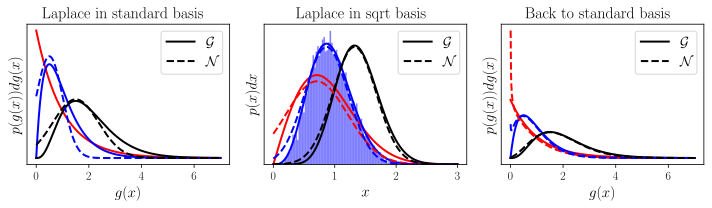

In [8]:
plot_gamma_t_sqrt(params=[[1,1], [2,2], [4,2]], save=True, filename='Gamma_sqrt_bridge.pdf', 
                  show_back=True, samples=True)

# Verify the Bridges

In [9]:
#verify the log bridge

def gamma_t_log_lambda(m,s): 
    return(1/(np.exp(m) * s**2))

def gamma_t_log_alpha(s):
    return(1/s**2)
    

test_a1, test_l1 = 3,4
test_m1, test_s1 = gamma_t_log_mode(test_a1, test_l1), np.sqrt(gamma_t_log_var(test_a1))
test_a2, test_l2 = gamma_t_log_alpha(test_s1), gamma_t_log_lambda(test_m1, test_s1)

print(test_a2, test_l2)

rand_a1, rand_l1 = np.random.random(), np.random.random()
rand_m1, rand_s1 = gamma_t_log_mode(rand_a1, rand_l1), np.sqrt(gamma_t_log_var(rand_a1))
rand_a2, rand_l2 = gamma_t_log_alpha(rand_s1), gamma_t_log_lambda(rand_m1, rand_s1)

assert(np.allclose(rand_a1, rand_a2))
assert(np.allclose(rand_l1, rand_l2))

3.0 4.0


In [10]:
#verify the sqrt bridge

def gamma_t_sqrt_lambda(s): 
    return(1/(4*s**2))

def gamma_t_sqrt_alpha(m, s):
    return(m**2/(4*s**2)+ 0.5)
    
    

test_a3, test_l3 = 5,6
test_m3, test_s3 = gamma_t_sqrt_mode(test_a3, test_l3), np.sqrt(gamma_t_sqrt_var(test_l3))
test_a4, test_l4 = gamma_t_sqrt_alpha(test_m3, test_s3), gamma_t_sqrt_lambda(test_s3)

print(test_a4, test_l4)

rand_a3, rand_l3 = np.random.random()+1, np.random.random()+1
rand_m3, rand_s3 = gamma_t_sqrt_mode(rand_a3, rand_l3), np.sqrt(gamma_t_sqrt_var(rand_l3))
rand_a4, rand_l4 = gamma_t_sqrt_alpha(rand_m3, rand_s3), gamma_t_sqrt_lambda(rand_s3)

assert(np.allclose(rand_a3, rand_a4))
assert(np.allclose(rand_l3, rand_l4))

5.0 6.0


# Statistical distance measures

## starting with MMD for one set of parameters

In [11]:
# look at MMD
from torch_two_sample import MMDStatistic
from scipy.stats import norm, gamma
import torch

In [12]:
def MMD_combinations(params, plot=False, n_samples=1000, verbose=True):
    
    As = params[0]
    Ls = params[1]
    #As = [5,4,8]
    #Ls = [1, 2, 3]

    MMD_sum = 0
    MMD_t_sqrt_sum = 0
    MMD_t_log_sum = 0 

    for a in As:
        for l in Ls:

            if verbose:
                print("a: ", a, "l: ", l)

            if a < 1:
                print("a < 1: not legitimate in standard base")

            #get samples from all dists
            #standard
            G_samples = gamma.rvs(a, scale=1/l, size=n_samples)
            if a >= 1:
                mode1 = gamma_mode(a, l)
                sigma1 = np.sqrt(gamma_var(a, l))
                N_samples = norm.rvs(mode1, sigma1, size=n_samples)

            #log
            mode1_log = gamma_t_log_mode(a, l)
            sigma1_log = np.sqrt(gamma_t_log_var(a))
            G_samples_log = np.log(G_samples)
            N_samples_log = norm.rvs(mode1_log, sigma1_log, size=n_samples)

            #sqrt
            mode1_sqrt = gamma_t_sqrt_mode(a, l)
            sigma1_sqrt = np.sqrt(gamma_t_sqrt_var(l))
            G_samples_sqrt = np.sqrt(G_samples)
            N_samples_sqrt = norm.rvs(mode1_sqrt, sigma1_sqrt, size=n_samples)


            #calculate MMD for all bases
            MMD = MMDStatistic(n_samples, n_samples)

            #standard
            G_samples_ = torch.Tensor(G_samples.reshape((n_samples, -1)))
            if a >= 1:
                N_samples_ = torch.Tensor(N_samples.reshape((n_samples, -1)))
                MMD_ = MMD(G_samples_, N_samples_,  alphas=[0.5], ret_matrix=False)
            else:
                MMD_ = torch.Tensor([np.nan])

            #log
            G_samples_log_ = torch.Tensor(G_samples_log.reshape((n_samples, -1)))
            N_samples_log_ = torch.Tensor(N_samples_log.reshape((n_samples, -1)))
            MMD_log_= MMD(G_samples_log_, N_samples_log_,  alphas=[0.5], ret_matrix=False)

            #sqrt
            G_samples_sqrt_ = torch.Tensor(G_samples_sqrt.reshape((n_samples, -1)))
            N_samples_sqrt_ = torch.Tensor(N_samples_sqrt.reshape((n_samples, -1)))
            MMD_sqrt_ = MMD(G_samples_sqrt_, N_samples_sqrt_,  alphas=[0.5], ret_matrix=False)

            if plot:
                n_bins = int(np.sqrt(n_samples))
                fig, axs = plt.subplots(nrows=1, ncols=3, sharex=False, figsize=(23, 6))
                axs[0].hist(G_samples, bins = n_bins, alpha=0.5, label='$\mathcal{G}$')
                axs[0].hist(N_samples, bins = n_bins, alpha=0.5, label='$\mathcal{N}$')
                axs[0].set_title('standard basis')
                axs[0].legend()

                axs[1].hist(G_samples_log, bins = n_bins, alpha=0.5, label='$\mathcal{G}$')
                axs[1].hist(N_samples_log, bins = n_bins, alpha=0.5, label='$\mathcal{N}$')
                axs[1].set_title('log basis')
                axs[1].legend()

                axs[2].hist(G_samples_sqrt, bins = n_bins, alpha=0.5, label='$\mathcal{G}$')
                axs[2].hist(N_samples_sqrt, bins = n_bins, alpha=0.5, label='$\mathcal{N}$')
                axs[2].set_title('sqrt basis')
                axs[2].legend()

                plt.show()

            if verbose: 
                print("standard: ", MMD_.item(), "log: ", MMD_log_.item(), "sqrt: ", MMD_sqrt_.item())

            #add them to their respective sums
            MMD_sum += MMD_
            MMD_t_log_sum += MMD_log_
            MMD_t_sqrt_sum += MMD_sqrt_
            
    return(MMD_sum.item(), MMD_t_log_sum.item(), MMD_t_sqrt_sum.item())

# KL-divergence from samples attempt 2

In [13]:
def KL_div_samples_gamma2(a, l, num_samples, base='standard', plot=False):
    
    gamma_samples = gamma.rvs(a, scale=1/l, size=num_samples)
    num_bins = int(np.sqrt(num_samples))
    
    #make sure that base is valid
    assert(base in ['standard', 'log', 'sqrt'])
    
    if base == 'log':
    
        gamma_samples_log = np.log(gamma_samples)
        mu_gamma_log = gamma_t_log_mode(a, l)
        sigma_gamma_log = np.sqrt(gamma_t_log_var(a))
        
        s = np.array(gamma_samples_log)
        p_ = gamma_pdf_t_log(s, a, l)
        q_ = norm.pdf(s, mu_gamma_log, sigma_gamma_log)
        KL_div_log_ = np.mean(np.log(p_/q_))
            
        if plot:
            x_ = np.linspace(s.min(), s.max(), 1000+1)
            plt.hist(s, density=True, bins=num_bins)
            plt.plot(x_, gamma_pdf_t_log(x_, a, l))
            plt.plot(x_, norm.pdf(x_, mu_gamma_log, sigma_gamma_log))
            plt.title('log-base')
            plt.show();
            
        return(KL_div_log_)
    
    elif base == 'sqrt':
    
        gamma_samples_sqrt = np.sqrt(gamma_samples)
        mu_gamma_sqrt = gamma_t_sqrt_mode(a, l)
        sigma_gamma_sqrt = np.sqrt(gamma_t_sqrt_var(l))
        
        s = np.array(gamma_samples_sqrt)
        p_ = gamma_pdf_t_sqrt(s, a, l)
        q_ = norm.pdf(s, mu_gamma_sqrt, sigma_gamma_sqrt)
        KL_div_sqrt_ = np.mean(np.log(p_ /q_ ))
            
        if plot:
            x_ = np.linspace(s.min(), s.max(), 1000+1)
            plt.hist(s, density=True, bins=num_bins)
            plt.plot(x_, gamma_pdf_t_sqrt(x_, a, l))
            plt.plot(x_, norm.pdf(x_, mu_gamma_sqrt, sigma_gamma_sqrt))
            plt.title('sqrt-base')
            plt.show();
            
        return(KL_div_sqrt_)
        
    
    elif base == 'standard':
    
        mu_gamma = gamma_mode(a, l)
        sigma_gamma = np.sqrt(gamma_var(a, l))
        
        s = np.array(gamma_samples)
        #p_ = gamma.pdf(s, a, scale=1/l)
        p_ = gamma_pdf(s, a, l)
        q_ = norm.pdf(s, mu_gamma, sigma_gamma)
        KL_div_ = np.mean(np.log(p_/q_))
            
        if plot:
            x_ = np.linspace(s.min(), s.max(), 1000+1)
            plt.hist(s, density=True, bins=num_bins)
            plt.plot(x_, gamma.pdf(x_, a, scale=1/l))
            plt.plot(x_, norm.pdf(x_, mu_gamma, sigma_gamma))
            plt.title('standard-base')
            plt.show();

        return(KL_div_)

In [14]:
def KL_div_sample_combinations2(params, num_samples, verbose=True, plot=False):
    
    As = params[0]
    Ls = params[1]
    
    KL_div_sum = 0
    KL_div_t_sqrt_sum = 0
    KL_div_t_log_sum = 0 

    for a in As:
        for l in Ls:
            
            if verbose:
                print("a: ", a, "l: ", l)
                
            if a < 1:
                print("a < 1: not legitimate in standard base")
            
            #compute KL-div for log and sqrt bases
            KL_div_log_ = KL_div_samples_gamma2(a, l, num_samples, base='log', plot=plot)
            KL_div_sqrt_ = KL_div_samples_gamma2(a, l, num_samples, base='sqrt', plot=plot)
            
            #calculate the KL divergences for standard base
            if a >= 1:
                KL_div_ = KL_div_samples_gamma2(a, l, num_samples, base='standard', plot=plot)
            else:
                KL_div_ = np.nan
            
            #add them to their respective sums
            KL_div_sum += KL_div_
            KL_div_t_log_sum += KL_div_log_
            KL_div_t_sqrt_sum += KL_div_sqrt_
            
            if verbose:
                print("standard: ", KL_div_, "log: ", KL_div_log_, "sqrt: ", KL_div_sqrt_)
            
            
    return(KL_div_sum, KL_div_t_log_sum, KL_div_t_sqrt_sum)

In [15]:
print(KL_div_sample_combinations2(params=[range(2, 12), range(1, 11)], plot=False, verbose=True, num_samples=10000))

a:  2 l:  1
standard:  0.8498950975950506 log:  0.1342587509625567 sqrt:  0.042273030037718595
a:  2 l:  2
standard:  0.8409016821740559 log:  0.13793287919211916 sqrt:  0.04185330779370033
a:  2 l:  3
standard:  0.8393878143310016 log:  0.14740381882895587 sqrt:  0.044998407886524074
a:  2 l:  4
standard:  0.8523906453755621 log:  0.12656090517836485 sqrt:  0.03965754667237136
a:  2 l:  5
standard:  0.8274817771358195 log:  0.1430666314777776 sqrt:  0.04029233266331004
a:  2 l:  6
standard:  0.842466464845322 log:  0.13202763054998803 sqrt:  0.04370685214599883
a:  2 l:  7
standard:  0.7956252968098836 log:  0.1286711157218087 sqrt:  0.039338503704559435
a:  2 l:  8
standard:  0.8440947179448509 log:  0.13940191450288342 sqrt:  0.03924771143874148
a:  2 l:  9
standard:  0.8530070342097863 log:  0.14512989516499863 sqrt:  0.040799115561455275
a:  2 l:  10
standard:  0.8552971899227446 log:  0.13595085488744196 sqrt:  0.040514306021209125
a:  3 l:  1
standard:  0.37820580685008737 log: 

standard:  0.09008063018375223 log:  0.018055855529820936 sqrt:  0.00512101949892944
a:  11 l:  9
standard:  0.0853997027111751 log:  0.018112610989049115 sqrt:  0.00596767035651142
a:  11 l:  10
standard:  0.08158802716501032 log:  0.02170383346481353 sqrt:  0.00450032396447242
(24.436822579652414, 4.917391676242773, 1.3471744191085664)


# make a plot for small, middle and large theta

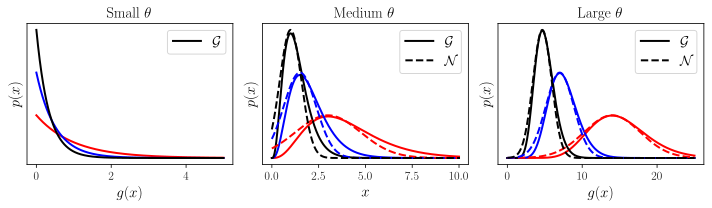

In [16]:

a1, a2, a3 = 1, 4, 15
l1, l2, l3 = 1, 2, 3

# create spaces for distributions
x1 = np.linspace(0, 5, 1000 + 1)
x2 = np.linspace(0, 10, 1000 + 1)
x3 = np.linspace(0, 25, 1000 + 1)

# create distributions
y1_small = gamma_pdf(x1, a1, l1)
y2_small = gamma_pdf(x1, a1, l2)
y3_small = gamma_pdf(x1, a1, l3)

y1_medium = gamma_pdf(x2, a2, l1)
y2_medium = gamma_pdf(x2, a2, l2)
y3_medium = gamma_pdf(x2, a2, l3)

y1_large = gamma_pdf(x3, a3, l1)
y2_large = gamma_pdf(x3, a3, l2)
y3_large = gamma_pdf(x3, a3, l3)


#normal
mode1_medium = gamma_mode(a2, l1)
mode2_medium = gamma_mode(a2, l2)
mode3_medium = gamma_mode(a2, l3)

sigma1_medium = np.sqrt(gamma_var(a2, l1))
sigma2_medium = np.sqrt(gamma_var(a2, l2))
sigma3_medium = np.sqrt(gamma_var(a2, l3))

norm1_medium = norm.pdf(x2, loc=mode1_medium, scale=sigma1_medium)
norm2_medium = norm.pdf(x2, loc=mode2_medium, scale=sigma2_medium)
norm3_medium = norm.pdf(x2, loc=mode3_medium, scale=sigma3_medium)

mode1_large = gamma_mode(a3, l1)
mode2_large = gamma_mode(a3, l2)
mode3_large = gamma_mode(a3, l3)

sigma1_large = np.sqrt(gamma_var(a3, l1))
sigma2_large = np.sqrt(gamma_var(a3, l2))
sigma3_large = np.sqrt(gamma_var(a3, l3))

norm1_large = norm.pdf(x3, loc=mode1_large, scale=sigma1_large)
norm2_large = norm.pdf(x3, loc=mode2_large, scale=sigma2_large)
norm3_large = norm.pdf(x3, loc=mode3_large, scale=sigma3_large)


"""Plots"""
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=15)
plt.rc('axes', labelsize=15)

legend_size=14
xlabel_size=15
ylabel_size=15
title_size=15
lw=2

fig, axs = plt.subplots(nrows=1, ncols=3, sharex=False, figsize=(10, 3))

#first plot
axs[0].plot(x1, y1_small, 'r-', lw=lw)
axs[0].plot(x1, y2_small, 'b-', lw=lw)
axs[0].plot(x1, y3_small, 'k-', lw=lw, label='$\mathcal{G}$')
axs[0].set_yticklabels([])
axs[0].set_yticks([])
axs[0].set_xlabel('$g(x)$', fontsize=xlabel_size)
axs[0].set_ylabel('$p(x)$', fontsize=ylabel_size)
axs[0].set_title(r'Small ${\theta}$', fontsize=title_size)
axs[0].legend(prop={'size': legend_size});

#second plot
axs[1].plot(x2, y1_medium, 'r-', lw=lw)
axs[1].plot(x2, y2_medium, 'b-', lw=lw)
axs[1].plot(x2, y3_medium, 'k-', lw=lw, label='$\mathcal{G}$')
axs[1].plot(x2, norm1_medium, 'r--', lw=lw)
axs[1].plot(x2, norm2_medium, 'b--', lw=lw)
axs[1].plot(x2, norm3_medium, 'k--', lw=lw, label='$\mathcal{N}$')
axs[1].set_yticklabels([])
axs[1].set_yticks([])
axs[1].set_xlabel('$x$', fontsize=xlabel_size)
axs[1].set_ylabel('$p(x)$', fontsize=ylabel_size)
axs[1].set_title(r'Medium ${\theta}$', fontsize=title_size)
axs[1].legend(prop={'size': legend_size});

axs[2].plot(x3, y1_large, 'r-', lw=lw)
axs[2].plot(x3, y2_large, 'b-', lw=lw)
axs[2].plot(x3, y3_large, 'k-', lw=lw, label="$\mathcal{G}$");
axs[2].plot(x3, norm1_large, 'r--', lw=lw)
axs[2].plot(x3, norm2_large, 'b--', lw=lw)
axs[2].plot(x3, norm3_large, 'k--', lw=lw, label="$\mathcal{N}$")
axs[2].set_yticklabels([])
axs[2].set_yticks([])
axs[2].set_xlabel('$g(x)$', fontsize=xlabel_size)
axs[2].set_ylabel('$p(x)$', fontsize=ylabel_size)
axs[2].set_title(r'Large ${\theta}$', fontsize=title_size)
axs[2].legend(prop={'size': legend_size});

plt.tight_layout()

#"""
tpl.save(
    "sml_Gamma.tex",
    figure = fig,
    axis_width = "\\figwidth",
    axis_height= "\\figheight",
    tex_relative_path_to_data=".",
    override_externals=True,
    float_format=".3g",
    #strict=True
)
#"""

plt.savefig('sml_Gamma.pdf')
plt.show();

# calculate KL div for increasing lambdas

In [17]:
As = np.arange(0.5, 10.5)
Bs = np.arange(0.5, 5.5, 0.5)
print(len(As), len(Bs))
ABs = np.array(list(zip(As, Bs)))
print(ABs)

10 10
[[0.5 0.5]
 [1.5 1. ]
 [2.5 1.5]
 [3.5 2. ]
 [4.5 2.5]
 [5.5 3. ]
 [6.5 3.5]
 [7.5 4. ]
 [8.5 4.5]
 [9.5 5. ]]


In [18]:
KL_results_linear = []

for s in range(10):
    print("seed: ", s)
    np.random.seed(s)
    
    results_seed = []
    for t in ABs:
        a_, b_ = t
        KL_ = KL_div_sample_combinations2(params = [[a_], [b_]], plot=False, num_samples=10000)
        print(KL_)
        results_seed.append(KL_)
    
    KL_results_linear.append(results_seed)

seed:  0
a:  0.5 l:  0.5
a < 1: not legitimate in standard base
standard:  nan log:  0.9359913195235027 sqrt:  0.839865760692652
(nan, 0.9359913195235027, 0.839865760692652)
a:  1.5 l:  1.0
standard:  1.7635259283452889 log:  0.19992930326468075 sqrt:  0.06292207844341652
(1.7635259283452889, 0.19992930326468075, 0.06292207844341652)
a:  2.5 l:  1.5
standard:  0.5558700581145829 log:  0.10438034053428101 sqrt:  0.031099270316620187
(0.5558700581145829, 0.10438034053428101, 0.031099270316620187)
a:  3.5 l:  2.0
standard:  0.35180035884322686 log:  0.0622117270145676 sqrt:  0.020799025707493816
(0.35180035884322686, 0.0622117270145676, 0.020799025707493816)
a:  4.5 l:  2.5
standard:  0.24039102695523928 log:  0.0548282728246975 sqrt:  0.012880363225301937
(0.24039102695523928, 0.0548282728246975, 0.012880363225301937)
a:  5.5 l:  3.0
standard:  0.1964742129235917 log:  0.04556251717926081 sqrt:  0.01151247099118748
(0.1964742129235917, 0.04556251717926081, 0.01151247099118748)
a:  6.5 l:

standard:  0.3402568090715611 log:  0.061920261160943596 sqrt:  0.01649960922156519
(0.3402568090715611, 0.061920261160943596, 0.01649960922156519)
a:  4.5 l:  2.5
standard:  0.256528678733991 log:  0.05305783085370445 sqrt:  0.01284684847756192
(0.256528678733991, 0.05305783085370445, 0.01284684847756192)
a:  5.5 l:  3.0
standard:  0.19345562414240022 log:  0.04029199415345306 sqrt:  0.014301101337922024
(0.19345562414240022, 0.04029199415345306, 0.014301101337922024)
a:  6.5 l:  3.5
standard:  0.14546761897979107 log:  0.03613563332914039 sqrt:  0.008354121427463465
(0.14546761897979107, 0.03613563332914039, 0.008354121427463465)
a:  7.5 l:  4.0
standard:  0.1235056471836205 log:  0.027935145220693947 sqrt:  0.007952436855886426
(0.1235056471836205, 0.027935145220693947, 0.007952436855886426)
a:  8.5 l:  4.5
standard:  0.12215102683362207 log:  0.03127345098557927 sqrt:  0.0074799448678505385
(0.12215102683362207, 0.03127345098557927, 0.0074799448678505385)
a:  9.5 l:  5.0
standard: 

In [19]:
# handle the data
KL_results_linear = np.array(KL_results_linear)

# take the mean over the 10 seeds
KL_results_linear_mean = KL_results_linear.mean(0)
print(np.shape(KL_results_linear_mean))

(10, 3)


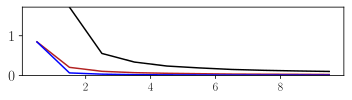

In [26]:
# make plots

fig = plt.figure(figsize=(5, 1.5))
plt.plot(As, KL_results_linear_mean[:,0], label='standard base', color='black')
plt.plot(As, KL_results_linear_mean[:,1], label='log base', color='firebrick')
plt.plot(As, KL_results_linear_mean[:,2], label='sqrt base', color='blue')
plt.ylim(0, np.nanmax(KL_results_linear_mean))
plt.tight_layout()

#"""
tpl.save(
    "KL_Gamma.tex",
    figure = fig,
    axis_width = "\\figwidth",
    axis_height= "\\figheight",
    tex_relative_path_to_data=".",
    override_externals=False,
    float_format=".3g"
)
#"""

plt.savefig('KL_Gamma.pdf')

plt.show();

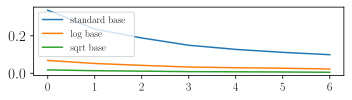

In [21]:
# make plots

plt.figure(figsize=(5, 1.5))
plt.plot(KL_results_linear_mean[3:,0], label='standard base')
plt.plot(KL_results_linear_mean[3:,1], label='log base')
plt.plot(KL_results_linear_mean[3:,2], label='sqrt base')
plt.legend()
plt.tight_layout()

plt.show();

# calculate MMD for the growing a, b and plot it

In [22]:
MMD_results_linear = []

for s in range(10):
    print("seed: ", s)
    np.random.seed(s)
    
    results_seed = []
    for t in ABs:
        a_, b_ = t
        MMD_ = MMD_combinations(params = [[a_], [b_]], n_samples=2000)
        results_seed.append(MMD_)
    
    MMD_results_linear.append(results_seed)

seed:  0
a:  0.5 l:  0.5
a < 1: not legitimate in standard base
standard:  nan log:  0.041663944721221924 sqrt:  0.21511220932006836
a:  1.5 l:  1.0
standard:  0.13901382684707642 log:  0.025678277015686035 sqrt:  0.003429114818572998
a:  2.5 l:  1.5
standard:  0.05457967519760132 log:  0.010201513767242432 sqrt:  0.003047168254852295
a:  3.5 l:  2.0
standard:  0.03747844696044922 log:  0.0054877400398254395 sqrt:  0.001370847225189209
a:  4.5 l:  2.5
standard:  0.0339353084564209 log:  0.004393041133880615 sqrt:  0.0008406639099121094
a:  5.5 l:  3.0
standard:  0.018502652645111084 log:  0.006628751754760742 sqrt:  0.0002994537353515625
a:  6.5 l:  3.5
standard:  0.01562654972076416 log:  0.002800881862640381 sqrt:  0.0004011988639831543
a:  7.5 l:  4.0
standard:  0.012575745582580566 log:  0.0015975236892700195 sqrt:  0.00017440319061279297
a:  8.5 l:  4.5
standard:  0.014469563961029053 log:  0.001250624656677246 sqrt:  0.0007264614105224609
a:  9.5 l:  5.0
standard:  0.012102425098

standard:  0.013402462005615234 log:  0.0007007718086242676 sqrt:  0.00024074316024780273
a:  9.5 l:  5.0
standard:  0.009385466575622559 log:  0.002302408218383789 sqrt:  1.4901161193847656e-06
seed:  8
a:  0.5 l:  0.5
a < 1: not legitimate in standard base
standard:  nan log:  0.036210715770721436 sqrt:  0.2013416290283203
a:  1.5 l:  1.0
standard:  0.13783323764801025 log:  0.017448365688323975 sqrt:  0.006950318813323975
a:  2.5 l:  1.5
standard:  0.060713768005371094 log:  0.00903940200805664 sqrt:  0.002695024013519287
a:  3.5 l:  2.0
standard:  0.047948598861694336 log:  0.0056539177894592285 sqrt:  0.0020071864128112793
a:  4.5 l:  2.5
standard:  0.02428460121154785 log:  0.004794657230377197 sqrt:  0.00043195486068725586
a:  5.5 l:  3.0
standard:  0.02182745933532715 log:  0.0033146142959594727 sqrt:  0.0005934834480285645
a:  6.5 l:  3.5
standard:  0.016998469829559326 log:  0.0023038387298583984 sqrt:  0.0005152225494384766
a:  7.5 l:  4.0
standard:  0.013019382953643799 log

In [23]:
# handle the data
MMD_results_linear = np.array(MMD_results_linear)

# take the mean over the 10 seeds
MMD_results_linear_mean = MMD_results_linear.mean(0)
print(np.shape(MMD_results_linear_mean))

(10, 3)


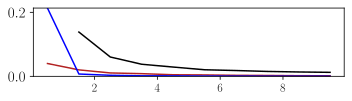

In [25]:
# make plots

fig = plt.figure(figsize=(5, 1.5))
plt.plot(As, MMD_results_linear_mean[:,0], label='standard base', color='black')
plt.plot(As, MMD_results_linear_mean[:,1], label='log base', color='firebrick')
plt.plot(As, MMD_results_linear_mean[:,2], label='sqrt base', color='blue')
plt.ylim(0, np.nanmax(MMD_results_linear_mean))
plt.tight_layout()

#"""
tpl.save(
    "MMD_Gamma.tex",
    figure = fig,
    axis_width = "\\figwidth",
    axis_height= "\\figheight",
    tex_relative_path_to_data=".",
    override_externals=False,
    float_format=".3g"
)
#"""

plt.savefig('MMD_Gamma.pdf')


plt.show();